In [1]:
import os

In [2]:
datad = 'C:\\Users\\admin\\cell_images'
os.listdir(datad)

['test', 'train']

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
#read custom images 
from matplotlib.image import imread
test_path = datad+'\\test\\'
train_path = datad+'\\train\\'

In [5]:
test_path

'C:\\Users\\admin\\cell_images\\test\\'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'


In [9]:
para_cell

'C:\\Users\\admin\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

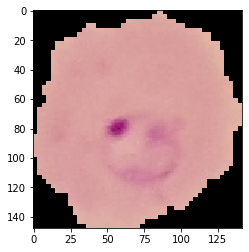

In [10]:
plt.imshow(imread(para_cell))

In [11]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [12]:
safe_cell=train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [13]:
imread(safe_cell).shape

(139, 160, 3)

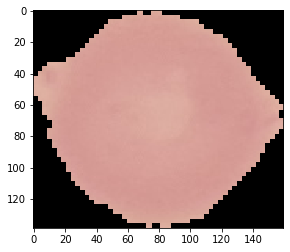

In [14]:
plt.imshow(imread(safe_cell))

In [15]:
len(os.listdir(test_path+'parasitized'))

1300

In [16]:
#real life images have different dimensions show we need to check on that too 

dim1=[]
dim2=[]

for img_path in os.listdir(test_path+'uninfected'):
    img=imread(test_path+'uninfected\\'+img_path)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [17]:
#cnn needs images of same size only so now work accordingly
#therefore now i'll have to choose some dimension it will the avg of all the various dimensions
np.mean(dim1)

130.92538461538462

In [18]:
np.mean(dim2)

130.75

In [19]:
image_shape=(130,130,3)

In [20]:
#image preprocessing 

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
image_gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,fill_mode='nearest',horizontal_flip=True)

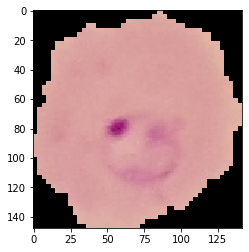

In [22]:
para_img=imread(para_cell)
plt.imshow(para_img)

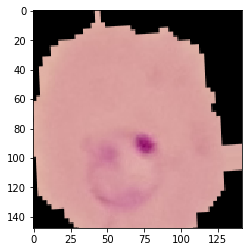

In [23]:
plt.imshow(image_gen.random_transform(para_img))

In [24]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [25]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout

In [26]:
model=Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [32]:
batch_size=16

train_image_gen =image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [31]:
test_image_gen =image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [67]:
results=model.fit_generator(train_image_gen,epochs=5,validation_data=test_image_gen,callbacks=[early_stop])

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1775/3120 [================>.............] - ETA: 6:46 - loss: 1.0462 - accuracy: 0.5004

KeyboardInterrupt: 

In [81]:

from tensorflow.keras.models import load_model

In [82]:
model=load_model('TF_2_Notebooks_and_Data\\04-CNNs\\malaria_detector.h5')

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [84]:
model.evaluate_generator(test_image_gen)

[36.87855529785156, 0.8700000047683716]

In [86]:
model.metrics_names

['loss', 'accuracy']

In [88]:
pred = model.predict_generator(test_image_gen)

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [89]:
pred

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [1.0000000e+00],
       [2.3036124e-26],
       [0.0000000e+00]], dtype=float32)

In [100]:
predictions=pred>0.8

In [101]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [102]:
len(predictions)

2600

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [105]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1274,   26],
       [ 305,  995]], dtype=int64)

In [106]:
para_cell


'C:\\Users\\admin\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [107]:
from tensorflow.keras.preprocessing import image

In [111]:
my_image=(image.load_img(para_cell,target_size=image_shape))

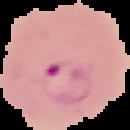

In [113]:
my_image

In [115]:
my_img_array=image.img_to_array(my_image)

In [116]:
my_img_array.shape

(130, 130, 3)

In [120]:

my_img_array=my_img_array.reshape(1,130,130,3)

In [121]:
my_img_array.shape

(1, 130, 130, 3)

In [122]:
model.predict(my_img_array)

array([[0.]], dtype=float32)

In [ ]:
#therefore this image is parasitic image